In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf

In [2]:
df = pd.read_excel("2021MCMProblemC_DataSet.xlsx")

In [3]:
df.head()

,GlobalID,Detection Date,Notes,Lab Status,Lab Comments,Submission Date,Latitude,Longitude
0,{5AC8034E-5B46-4294-85F0-5B13117EBEFE},43807,"One dead wasp seen in Blaine, and suspect flyi...",Positive ID,,43845,48.980994,-122.688503
1,{5EAD3364-2CA7-4A39-9A53-7F9DCF5D2041},43768,Hornet specimen sent to WSU,Positive ID,,43845,48.971949,-122.700941
2,{13B67BCB-AFCE-4100-AD2B-76EF178BA228},43845,"Massive loss of bees, decapitated. No hornet s...",Unverified,,43845,48.939200,-122.661300
3,{124B9BFA-7F7B-4B8E-8A56-42E067F0F72E},43727,This was the colony that was found and destroy...,Positive ID,"Thanks for adding this, and the great pictures!",43865,49.149394,-123.943134
4,{BBBA5BA0-CAFB-43D3-8F1D-FB2D9CF777E0},43708,I was cleaning my gutters when I heard a snapp...,Unverified,Thanks for this report. I can't verify it from...,43875,48.723779,-122.354431


In [4]:
df.dropna(inplace = True)

In [5]:
df.isna().sum()

GlobalID           0
Detection Date     0
Notes              0
Lab Status         0
Lab Comments       0
Submission Date    0
Latitude           0
Longitude          0
dtype: int64

In [6]:
def lab_status(status):
    if(status == 'Positive ID'):
        return 0
    if(status == 'Negative ID'):
        return 1
    if(status == 'Unverified'):
        return 2
    return 3

df['Lab Status'] = df['Lab Status'].apply(lab_status)

In [7]:
del df["Notes"]
del df["Detection Date"]
del df["Lab Comments"]
del df["Submission Date"]
del df["Latitude"]
del df["Longitude"]

In [8]:
df.dropna(inplace = True)

In [9]:
df.isna().sum()

GlobalID      0
Lab Status    0
dtype: int64

In [10]:
df['Lab Status'].value_counts()

2    2342
1    2069
0    1003
3      15
Name: Lab Status, dtype: int64

In [11]:
from tqdm import tqdm

In [12]:
ROOT = '../2021MCM_ProblemC_Files/'

In [13]:
df2 = pd.read_excel("2021MCM_ProblemC_ Images_by_GlobalID.xlsx")

In [14]:
df2.head()

,FileName,GlobalID,FileType
0,ATT1_DSCN9647.jpg,{5AC8034E-5B46-4294-85F0-5B13117EBEFE},image/jpg
1,ATT10_67EAF187-B59C-4F5F-BAAC-9F76E06A96D6.jpg,{C4F44511-EA53-4FCF-9422-E1C57703720D},image/jpg
2,ATT100_inbound241937372812029587.jpg,{43506835-18B8-46B2-A2CB-586AF9C8ECE6},image/jpg
3,ATT1000_A5A50BAB-A6EF-4576-A1F8-A07862AADE3A.jpg,{E0AE2F2A-38A5-463C-97B5-9F84A477F9AE},image/jpg
4,ATT1001_8B9F8599-61EF-4690-B195-888BCD319F32.png,{1CD14B56-4046-44C4-B1B8-8FB07A9071E9},image/png


In [15]:
result = pd.merge(df,df2,on='GlobalID',how='outer')

In [16]:
df['Lab Status'].value_counts()

2    2342
1    2069
0    1003
3      15
Name: Lab Status, dtype: int64

In [17]:
result['Lab Status'].value_counts()

1    3220
2    2360
0    1006
3      21
Name: Lab Status, dtype: int64

In [18]:
def dropf(filename):
    if(filename == "image/jpg" or filename == "image/png"):
        return True
    return
result['FileType'] = result['FileType'].apply(dropf)

In [19]:
result.isna().sum()

GlobalID         0
Lab Status       0
FileName      2313
FileType      2423
dtype: int64

In [20]:
result.dropna(inplace = True)

In [21]:
result.isna().sum()

GlobalID      0
Lab Status    0
FileName      0
FileType      0
dtype: int64

In [22]:
result['Lab Status'].value_counts()

1    3097
0    1003
2      73
3      11
Name: Lab Status, dtype: int64

In [23]:
del result['GlobalID']
del result['FileType']

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test = train_test_split(result,test_size = 0.3, random_state = 50)

In [25]:
def lab_status2(status):
    if(status == 3):
        return 3
    return 

result['Lab Status'] = result['Lab Status'].apply(lab_status2)

In [26]:
result.dropna(inplace = True)

In [27]:
def lab_status3(status):
    if(status == 0):
        return 0
    if(status == 1):
        return 1
    if(status == 2):
        return 2
    return
x_train['Lab Status'] = x_train['Lab Status'].apply(lab_status3)
x_test['Lab Status'] = x_test['Lab Status'].apply(lab_status3)
x_train.dropna(inplace = True)
x_test.dropna(inplace = True)

<ipython-input-27-a8f6e41150e6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['Lab Status'] = x_train['Lab Status'].apply(lab_status3)
<ipython-input-27-a8f6e41150e6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['Lab Status'] = x_test['Lab Status'].apply(lab_status3)
<ipython-input-27-a8f6e41150e6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [28]:
import cv2

In [29]:
IMG_SIZE = 150

def create_datasets(result2, img_size):
    imgs = []
    paths = []
    for path in tqdm(result2['FileName']):
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (img_size,img_size))
        imgs.append(img)
        paths.append(path)
    imgs = np.array(imgs, dtype = 'float32')
    imgs = imgs / 255.0
    #df_ = pd.get_dummies(result['Lab Status'])
    df_ = np.array(result2['Lab Status'], dtype = 'int32')
    return imgs, df_, paths

train_imgs, train_df, train_paths = create_datasets(x_train, IMG_SIZE)
test_imgs, test_df, test_paths = create_datasets(x_test, IMG_SIZE)
pre_imgs, pre_df, pred_paths = create_datasets(result, IMG_SIZE)

100%|█████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 159.45it/s]


In [30]:
x_train

,Lab Status,FileName
829,1.0,ATT192_20200517_142140.jpg
2070,1.0,ATT1038_55590E40-99DE-4027-B20F-064B6E8C8EC7.jpg
2677,1.0,ATT1428_63AA55EC-DAEB-4934-A69A-D2B4090CBDB4.jpg
5505,1.0,ATT3242_20201012_141753.jpg
5850,0.0,B (233).jpg
...,...,...
5753,0.0,B (136).jpg
174,2.0,ATT74_image0 (27).jpg
346,1.0,ATT136_90CDFD8E-DC18-4DA3-A3C4-7F523755CDFD.jpg
3751,1.0,ATT2086_2B0A0898-1BF8-4C47-827C-08F2720CE482.jpg


In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'sigmoid', input_shape = (150, 150, 3)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'sigmoid'),
    #tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dense(4, activation=tf.nn.sigmoid),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax),
])

In [32]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [33]:
history = model.fit(train_imgs, train_df, batch_size=32, epochs=20, validation_split = 0.2)

Epoch 1/20
73/73 [==============================] - 8s 55ms/step - loss: 6.4288 - accuracy: 0.6243 - val_loss: 0.8563 - val_accuracy: 0.7534
Epoch 2/20
73/73 [==============================] - 3s 42ms/step - loss: 0.5821 - accuracy: 0.7586 - val_loss: 0.8445 - val_accuracy: 0.7534
Epoch 3/20
73/73 [==============================] - 3s 42ms/step - loss: 0.5737 - accuracy: 0.7634 - val_loss: 0.7993 - val_accuracy: 0.7671
Epoch 4/20
73/73 [==============================] - 3s 42ms/step - loss: 0.5058 - accuracy: 0.8178 - val_loss: 0.7042 - val_accuracy: 0.8134
Epoch 5/20
73/73 [==============================] - 3s 42ms/step - loss: 0.4351 - accuracy: 0.8521 - val_loss: 0.7012 - val_accuracy: 0.8185
Epoch 6/20
73/73 [==============================] - 3s 42ms/step - loss: 0.3770 - accuracy: 0.8819 - val_loss: 0.4327 - val_accuracy: 0.8630
Epoch 7/20
73/73 [==============================] - 3s 42ms/step - loss: 0.3600 - accuracy: 0.8984 - val_loss: 0.3718 - val_accuracy: 0.8990
Epoch 8/20
73

In [34]:
import matplotlib.pyplot as plt             

def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.ylim(0.5,1)
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")
    plt.ylim(0,1)
    plt.legend()
    plt.show()

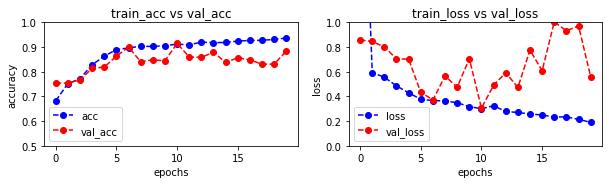

In [35]:
plot_accuracy_loss(history)

In [36]:
def display_random_image(images, labels, paths):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index))
    print(labels[index])
    print(paths[index])
    #print(x_train[x_train['index']==index])
    plt.show()

1
ATT3186_20201005_145258.jpg


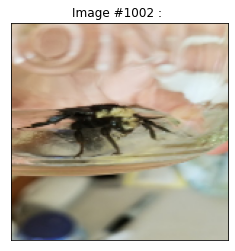

In [37]:
display_random_image(train_imgs, train_df, train_paths)

1
ATT2399_1F1F76CF-0765-41B4-B85B-47340F18CB33.png


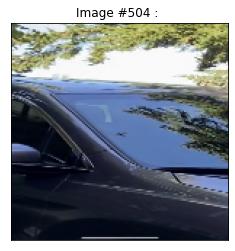

In [38]:
predictions = model.predict(test_imgs)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(test_imgs, pred_labels, test_paths)

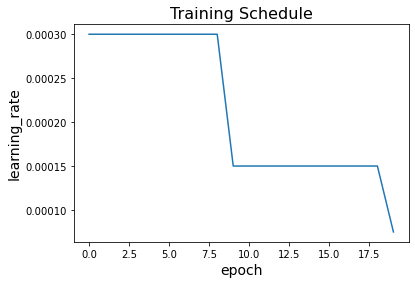

In [39]:
EPOCHS = 20
BATCH_SIZE = 128
import math
def get_lr_callback(batch_size=128, plot=False):
    start_lr = 3e-4
    def step_decay(epoch):
        drop = 0.5
        epochs_drop = 10.0
        lr = start_lr * math.pow(drop, math.floor((1+epoch)/epochs_drop))
        return lr
    
    lr_callback = tf.keras.callbacks.LearningRateScheduler(step_decay)
    if plot == True:
        rng = [i for i in range(EPOCHS)]
        y = [step_decay(x) for x in rng]
        plt.plot(rng, y)
        plt.xlabel('epoch', size=14)
        plt.ylabel('learning_rate', size=14)
        plt.title('Training Schedule', size=16)
        plt.show()
        
    return lr_callback


get_lr_callback(plot=True)

In [40]:
model.evaluate(test_imgs, test_df)

40/40 [==============================] - 0s 12ms/step - loss: 0.5814 - accuracy: 0.8627


[0.5814220309257507, 0.8627294301986694]

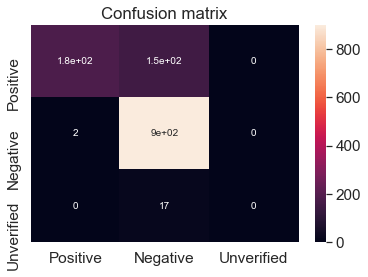

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
class_names = ['Positive', 'Negative', 'Unverified']
CM = confusion_matrix(test_df, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [42]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

model = VGG16(weights='imagenet', include_top=False)

In [43]:
train_features = model.predict(train_imgs)
test_features = model.predict(test_imgs)

In [44]:
n_train, x, y, z = train_features.shape
n_test, x, y, z = test_features.shape
numFeatures = x * y * z

In [45]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 2)

X = train_features.reshape((n_train, x*y*z))
pca.fit(X)

C = pca.transform(X) # Représentation des individus dans les nouveaux axe
C1 = C[:,0]
C2 = C[:,1]

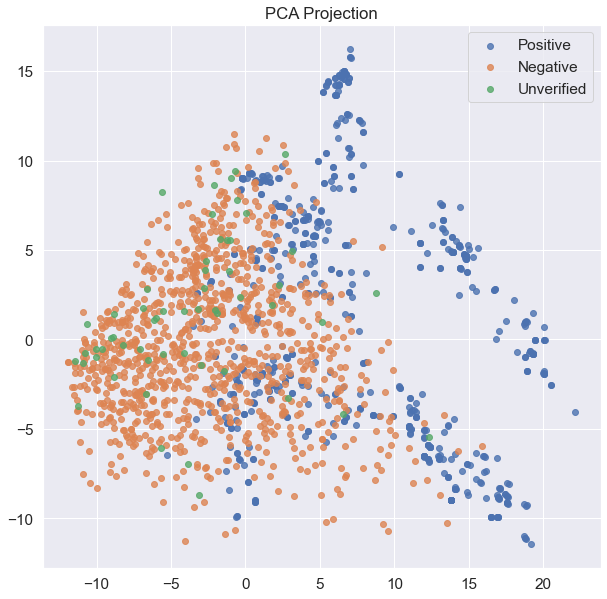

In [46]:
### Figures

plt.subplots(figsize=(10,10))

for i, class_name in enumerate(class_names):
    plt.scatter(C1[train_df == i][:1000], C2[train_df == i][:1000], label = class_name, alpha=0.8)
plt.legend()
plt.title("PCA Projection")
plt.show()

In [47]:
from keras.models import Model

model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=model.inputs, outputs=model.layers[-5].output)

In [48]:
train_features = model.predict(train_imgs)
test_features = model.predict(test_imgs)

In [49]:
from keras.layers import Input, Dense, Conv2D, Activation , MaxPooling2D, Flatten, Dropout

model2 = VGG16(weights='imagenet', include_top=False)

input_shape = model2.layers[-4].get_input_shape_at(0) # get the input shape of desired layer
layer_input = Input(shape = (9, 9, 512)) # a new input tensor to be able to feed the desired layer
# https://stackoverflow.com/questions/52800025/keras-give-input-to-intermediate-layer-and-get-final-output

x = layer_input
for layer in model2.layers[-4::1]:
    x = layer(x)
    
x = Conv2D(64, (3, 3), activation='relu')(x)
x = Dropout(0.1)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(50,activation='relu')(x)
x = Dense(6,activation='softmax')(x)

# create the model
new_model = Model(layer_input, x)

In [50]:
new_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [51]:
new_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 9, 9, 512)]       0         
_________________________________________________________________
block5_conv1 (Conv2D)        multiple                  2359808   
_________________________________________________________________
block5_conv2 (Conv2D)        multiple                  2359808   
_________________________________________________________________
block5_conv3 (Conv2D)        multiple                  2359808   
_________________________________________________________________
block5_pool (MaxPooling2D)   multiple                  0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 64)          294976    
_________________________________________________________________
dropout_2 (Dropout)          (None, 2, 2, 64)          0   

In [52]:
history = new_model.fit(train_features, train_df, batch_size=128, epochs=10, validation_split = 0.2)

Epoch 1/10
19/19 [==============================] - 4s 126ms/step - loss: 2.1604 - accuracy: 0.6152 - val_loss: 0.3887 - val_accuracy: 0.8682
Epoch 2/10
19/19 [==============================] - 2s 89ms/step - loss: 0.3629 - accuracy: 0.8626 - val_loss: 0.2501 - val_accuracy: 0.9161
Epoch 3/10
19/19 [==============================] - 2s 89ms/step - loss: 0.2099 - accuracy: 0.9341 - val_loss: 0.2474 - val_accuracy: 0.9247
Epoch 4/10
19/19 [==============================] - 2s 91ms/step - loss: 0.1801 - accuracy: 0.9544 - val_loss: 0.1346 - val_accuracy: 0.9709
Epoch 5/10
19/19 [==============================] - 2s 91ms/step - loss: 0.1188 - accuracy: 0.9695 - val_loss: 0.0965 - val_accuracy: 0.9743
Epoch 6/10
19/19 [==============================] - 2s 90ms/step - loss: 0.1053 - accuracy: 0.9741 - val_loss: 0.0920 - val_accuracy: 0.9812
Epoch 7/10
19/19 [==============================] - 2s 96ms/step - loss: 0.0847 - accuracy: 0.9781 - val_loss: 0.1034 - val_accuracy: 0.9726
Epoch 8/10
1

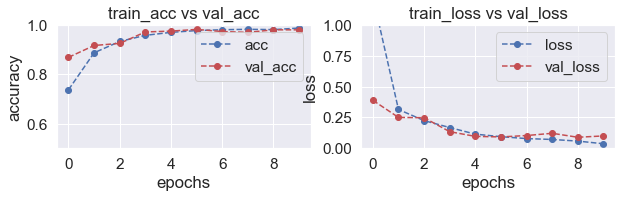

In [53]:
plot_accuracy_loss(history)

In [54]:
from sklearn.metrics import accuracy_score
predictions = new_model.predict(test_features)    
pred_labels = np.argmax(predictions, axis = 1)
print("Accuracy : {}".format(accuracy_score(test_df, pred_labels)))

Accuracy : 0.9768555466879489


In [55]:
pred_features = model.predict(pre_imgs)
our_predictions = new_model.predict(pred_features)

In [56]:
result.head(500)

,Lab Status,FileName
5598,3.0,ATT3295_42311DF4-A9FC-48E0-80A0-44FB7F9D1BD0.jpg
5602,3.0,ATT3296_Screenshot_20201023-035213_Blink.jpg
5603,3.0,ATT3297_Screenshot_20201023-035325_Blink.jpg
5604,3.0,ATT3298_Screenshot_20201023-035341_Blink.jpg
5605,3.0,ATT3299_Screenshot_20201023-035247_Blink.jpg
5606,3.0,ATT3300_Screenshot_20201023-035401_Blink.jpg
5610,3.0,ATT3301_42D408C0-95F0-4121-B0CF-D3AF977F25B0.png
5612,3.0,ATT3302_tmp-cam-4811883243317525499.jpg
5613,3.0,ATT3303_5F5E645F-0249-4CF9-84E2-9E7BCD1CE348.jpg
5614,3.0,ATT3304_3F3414C0-1943-4ABC-BA74-241D6C0EAA35.jpg


In [57]:
def display_examples(class_names, images, labels):

    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Unprocessed images of the dataset", fontsize=16)
    for i in range(11):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

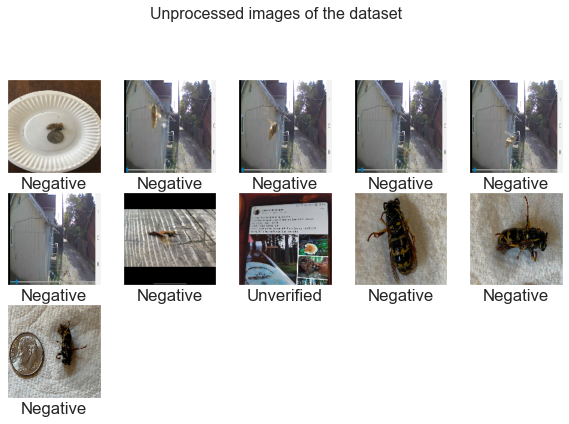

In [58]:
pred_labels = np.argmax(our_predictions, axis = 1) # We take the highest probability
display_examples(class_names, pre_imgs, pred_labels)

In [59]:
pred_features2 = model.predict(test_imgs)
our_predictions2 = new_model.predict(pred_features2)

In [60]:
def display_examples(class_names, images, labels):

    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

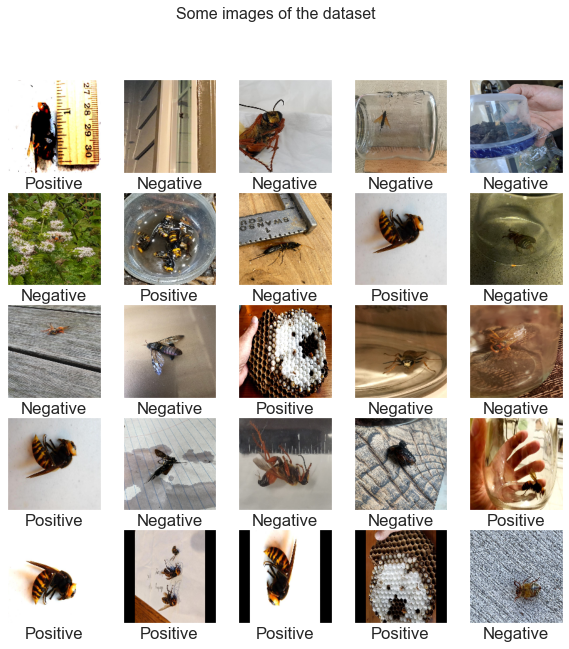

In [61]:
pred_labels2 = np.argmax(our_predictions2, axis = 1) # We take the highest probability

display_examples(class_names, test_imgs, pred_labels2)